Name: Jiya Hona
Symbol No: 29097/078

Naive Bayes vs Decision Tree Classifier Performance:

Naive Bayes Accuracy: 0.80
Decision Tree Accuracy: 0.78
Naive Bayes ROC AUC: 0.80
Decision Tree ROC AUC: 0.79
Naive Bayes CV Accuracy: 0.79 (±0.00)
Decision Tree CV Accuracy: 0.79 (±0.01)

Confusion Matrix - Naive Bayes:
 [[132  28]
 [ 31 109]]

Confusion Matrix - Decision Tree:
 [[119  41]
 [ 24 116]]

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.82       160
           1       0.80      0.78      0.79       140

    accuracy                           0.80       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.80      0.80      0.80       300


Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.74      0.79       160
           1       0.74      0.83      0.78       140

    accuracy                         

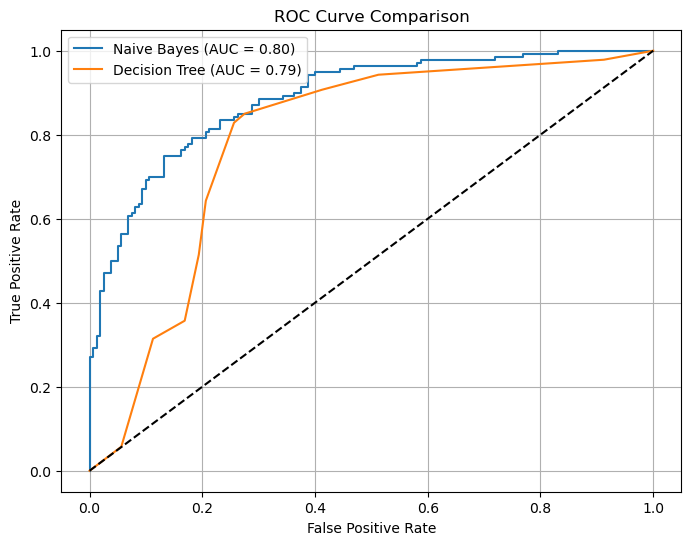

In [4]:
print("Name: Jiya Hona")
print("Symbol No: 29097/078")

import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report, roc_curve
import matplotlib.pyplot as plt

# Generate a synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize classifiers
nb_classifier = GaussianNB()
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=5)  # Limited depth to avoid overfitting

# Train the models
nb_classifier.fit(X_train, y_train)
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_classifier.predict(X_test)
y_pred_dt = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy_nb = nb_classifier.score(X_test, y_test)
accuracy_dt = dt_classifier.score(X_test, y_test)

# Calculate confusion matrices
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Calculate ROC AUC scores
roc_auc_nb = roc_auc_score(y_test, y_pred_nb)
roc_auc_dt = roc_auc_score(y_test, y_pred_dt)

# Perform 5-fold cross-validation
cv_scores_nb = cross_val_score(nb_classifier, X, y, cv=5, scoring='accuracy')
cv_scores_dt = cross_val_score(dt_classifier, X, y, cv=5, scoring='accuracy')

# Print comparison results
print("\nNaive Bayes vs Decision Tree Classifier Performance:\n")
print(f"Naive Bayes Accuracy: {accuracy_nb:.2f}")
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")
print(f"Naive Bayes ROC AUC: {roc_auc_nb:.2f}")
print(f"Decision Tree ROC AUC: {roc_auc_dt:.2f}")
print(f"Naive Bayes CV Accuracy: {cv_scores_nb.mean():.2f} (±{cv_scores_nb.std():.2f})")
print(f"Decision Tree CV Accuracy: {cv_scores_dt.mean():.2f} (±{cv_scores_dt.std():.2f})")
print("\nConfusion Matrix - Naive Bayes:\n", conf_matrix_nb)
print("\nConfusion Matrix - Decision Tree:\n", conf_matrix_dt)
print("\nNaive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))
print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

# Plot ROC curves
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_classifier.predict_proba(X_test)[:, 1])
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_classifier.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()